<a href="https://colab.research.google.com/github/GeraGM01/Clasificador-de-g-neros-musicales/blob/main/Clasificador_de_g%C3%A9neros_musicales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IDENTIFICDOR DE GENEROS MUSICALES A PARTIR DE UN AUDIO**

1. Objetivo del proyecto


*   El objetivo principal del proyecto es realizar un algoritmo que sea capaz de identificar el genero de las
canciones que están sonando en el entorno esto utilizando algoritmos de inteligencia artificial.




2. Dataset a usar


*   El dataset que se va a utilizar para el entrenamiento de este proyecto va a ser un dataset conocido como "echo-nest, la cual es una recopilacion de datos musicales pensada para desarolladores y empresas que pertenece a spotify.
Este dataset esta en formato json y basicamente una canción es más que su título, artista y número de escuchas"

*   Otro de los set de datos que tenemos es uno de "Datacamp" el cual tiene características musicales de cada pista, como la capacidad de baile y la acústica en una escala de -1 a 1.

*   El objetivo de analizar estos set de datos es poder clasificar estos datos de acuerdo al genero.









3. ***Implementación del codigo***







In [ ]:
#Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Creamos una variable y leemos los datos que estan dentro de nuestro dataset, es decir las pistas con etiquetas de genero
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')


In [ ]:
#Como debug para saber que si esta leyendo nuestros datos del dataset, imprimimos los primeros 5
print (tracks.head(5))

   track_id  bit_rate  comments        composer         date_created  \
0       135    256000         1             NaN  2008-11-26 01:43:26   
1       136    256000         1             NaN  2008-11-26 01:43:35   
2       151    192000         0             NaN  2008-11-26 01:44:55   
3       152    192000         0             NaN  2008-11-26 01:44:58   
4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

  information interest  language_code  \
0         NaN     2484             en   
1         NaN     1948             en   
2         N

In [ ]:
#Creamos una variable y leemos las metricas de seguimiento con las funciones
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float=True)

In [ ]:
#Campos con la cantidad de registros y tipos de datos
print(echonest_metrics.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB
None


In [ ]:
#Muestra mas informacion de nuestra dataset
print(echonest_metrics.describe())

            track_id  acousticness  danceability        energy  \
count   13129.000000  1.312900e+04  13129.000000  13129.000000   
mean    34031.058268  5.246876e-01      0.487290      0.537516   
std     28950.422182  3.837186e-01      0.190148      0.278049   
min         2.000000  9.035000e-07      0.051307      0.000020   
25%     12986.000000  1.037726e-01      0.344759      0.321300   
50%     28097.000000  5.739848e-01      0.485635      0.549113   
75%     45021.000000  9.207270e-01      0.629094      0.776254   
max    124911.000000  9.957965e-01      0.968645      0.999964   

       instrumentalness      liveness   speechiness         tempo  \
count      13129.000000  13129.000000  13129.000000  13129.000000   
mean           0.640536      0.187804      0.099174    123.080061   
std            0.361430      0.158051      0.137381     35.015137   
min            0.000000      0.025297      0.022324     12.753000   
25%            0.323466      0.101406      0.036932     95.9

In [ ]:
#Hasta este punto ya tenemos como tal toda la informacion de las canciones
#pero estan separadas en diferentes archvos, por lo cual las vamos a ligar
#de acuerdo a su id

#Usamos pandas para hacer la union de la informacion
echo_tracks = pd.merge(echonest_metrics, tracks[["track_id", "genre_top"]], on='track_id')


In [ ]:
# Observamos la informacion resultante de la únion
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


Para evitar duplicados(Redundancia) de funciones hacemos una matriz de correlacion.



*   Matriz de correlacion: Es una tabla que muestra los coeficientes de correlación entre todas las variables en un conjunto de datos.

*   El coeficiente de correlación de Pearson puede variar en un rango de -1 a 1, donde:


    *   1 indica una correlación positiva perfecta (ambas variables aumentan juntas en una relación lineal).
    *   0 indica ausencia de correlación.
    *   1 indica una correlación negativa perfecta (una variable disminuye mientras la otra aumenta en una relación lineal).








In [ ]:
#Se crea una matriz de correlaccion, por el metodo pearson
corr_metrics = echo_tracks.corr(method='pearson')
#Dar estilo al mapa de calor
corr_metrics.style.background_gradient()

<ipython-input-10-fc59b6b88ddb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_metrics = echo_tracks.corr(method='pearson')


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [ ]:
# Define nuestras características para el conjunto de datos y OJO aqui no vamos a usar todas, ya que hay
# algunas que no nos van a interesar, entonces con este drop vamos a eliminar el genero y el track ID
features = echo_tracks.drop(['genre_top', 'track_id'], axis=1)

# Definimos esta etiqueta
labels = echo_tracks['genre_top']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Escalamos las caracteristicas para que el modelo pueda tomar una misma medicion esto lo hacemos
# cuando los datos no estan normalizados
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)


Analizamos los componentes principales de nuestra escala:

Ya que hemos procesado los datos de la matriz de correlación, ahora si podemos hacer un PCA y determinar cuanto podemos reducir la dimensionalidad de los datos.

El grafico que nos dara, nos va a mostrar de manera descendiente la varianza.


Text(0.5, 0, 'Componente principal #')

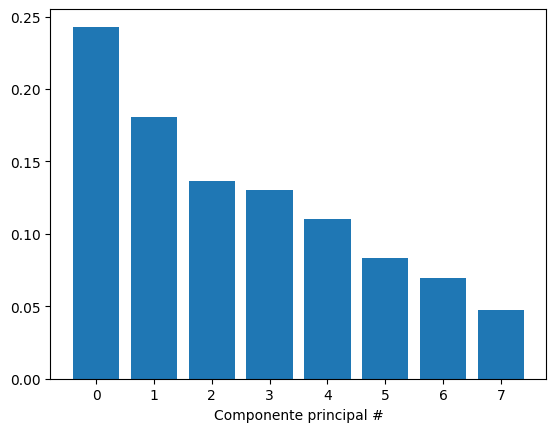

In [ ]:
# Con esta linea vamos a mostrar el grafico de la varianza
%matplotlib inline

# Import our plotting module, and PCA class
from sklearn.decomposition import PCA

# Obtenemos las relaciones de la variaza del PCA
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# Mostramos la varianza con un grafico de barras
fig, ax = plt.subplots()
ax.bar(range(8), exp_variance)
ax.set_xlabel('Componente principal #')

Podemos observar que este grafico no nos da mucha información que nos pueda ser útil para encontrar el numero de dimensiones, es muy limitada esa información por lo cual mejor vamos a crear un grafico de varianza acumulativa

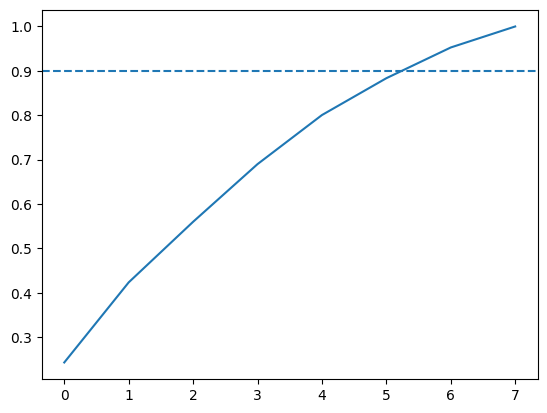

In [ ]:
# Calculo de la varianza acumulativa
cum_exp_variance = np.cumsum(exp_variance)

# Trazo de la varianza acumulativa y se hace un dibujo punteado en 0.90.
# Rango de 0 a 8 y de 0 a 10.
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

# Realizar PCA con el número elegido de componentes y proyectar datos en componentes
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

**Metodo de clasificacion de los datos**

***ARBOL DE DECISIONES***

Aqui vamos a crear un arbol de decisiones para asi poder hacer la clasificacion del genero musical.
Lo que vamos a hacer es dividir nuestro conjunto de datos en datos de entrenamiento y datos de prueba, en donde el conjunto de entrenamiento se usara para entrenar el modelo mientras que el otro conjunto de prueba lo usaremos para evaluar y validar el rendimiento del modelo.

In [ ]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Dividimos nuestros para despues ocuparlos en entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

# Entrenamos el arbol con los datos de entrenamiento
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

#  Predecimos las etiquetas resultantes con los datos de prueba
pred_labels_tree = tree.predict(test_features)

**Obtenemos nuestro reporte de clasificación ya de nuestro arbol entrenado y lo visualizamos**

In [ ]:
# Creamos la clasificacion del reporte de nuestro modelo
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201



**Análisis de los resultados del Árbol de decisión**                  
En esta parte ya podemos observar que la precisión para las canciones de Hip Hop esta algo baja mientras que para las canciones de Rock esta algo elevada, en el recall podemos observar que en Hip Hop esta en el 0.60% y esto quiere decir que esa fue la capacidad que tuvo el modelo para encontrar falsos positivos y de igual forma sigue siendo algo baja para el caso del hip hop y en el caso de soporte que es el numero de registros con los que se esta trabajando, vemos que de igual forma esta muy bajo y es por ello que vamos a equilibrar esos datos para que no haya un desbalanceo entre ambos géneros y haya una mejor precisión.

Observando nuestro reporte podemos ver que las canciones de rock están bastante bien clasificadas, pero las canciones de hip hop no, están desproporcionalmente mal clasificadas como canciones de rock y esto se debe a que tenemos muchos mas puntos de datos para la clasificación de Rock que para la de Hip Hop y esto hace que haya un sesgo en el modelo y la capacidad para clasificar y distinguir las dos clases y esto hace una mayor precisión para la clasificación del genero Rock.
Para resolver esto vamos a re dimensionar el set de datos.


In [ ]:
# Hacemos un subconjunto de datos, solo vamos a tomar los datos de echo track con su campo de genero tanto para hip hop y rock
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# muestrea las canciones de rock para que sean el mismo número de las canciones que hay de hip-hop
rock_only = rock_only.sample(len(hop_only), random_state=10)

# Concatenamos los datos  datos rock_only y hop_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# Con las caracteristicas de las etiquetas y la proyeccion del PCA vamos a crear el marco de datos para equilibrarlo
# y se quite el sesgo
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1)
labels = rock_hop_bal['genre_top']
pca_projection = pca.fit_transform(scaler.fit_transform(features))

# Redefinimos el conjunto de datos para entrenar y volvemos a usar los datos para que esten balanceado
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

**Análisis del segundo reporte ya con el balanceo de datos**

Aqui ya hicimos el equilibrio con los datos nuevos y vamos a ver si en realidad ese equilibrio nuevo mejoro el sesgo que había.

In [ ]:
# Entrenamiento del nuevo arbol ya con los datos balanceados
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Mostramos el reporte del nuevo arbol
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.74      0.73      0.74       230
        Rock       0.73      0.74      0.73       225

    accuracy                           0.74       455
   macro avg       0.74      0.74      0.74       455
weighted avg       0.74      0.74      0.74       455

